Black Scholes Equation:

$V(S, t)$: Price of option (we will be using call options) <br>
$S(t)$: Underlying stock Price<br>
$t$: Time<br>
$\sigma$: Volitility<br>
$r$: Risk Free Interest Rate <br>
$T$: Final time/Option maturity

$ \begin{align} \frac{\partial V}{\partial t} + \frac{1}{2}\sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} + rS\frac{\partial V}{\partial S} - rV = 0 \end{align}$

With Boundary conditons: :
$\begin{align}
  C(0, t) &= 0\text{ for all }t \\
  C(S, t) & \sim S - K e^{-r(T-t)}\text{ as }S \rightarrow \infty \\
  C(S, T) &= \max\{S - K, 0\}
\end{align}$

Difference quotients for FDM:

$$
\frac{\partial V}{\partial t}(S, t) \approx \frac{1}{k}(V(S, t + k)-V(S, t))
$$

$$
\frac{\partial V}{\partial S}(S, t) \approx \frac{1}{2h}(V(S + h, t)-V(S - h, t))
$$

$$
\frac{\partial^2 V}{\partial S^2}(S, t) \approx \frac{1}{h^2}(V(S+h, t)-2 V(S, t)+V(S-h, t))
$$

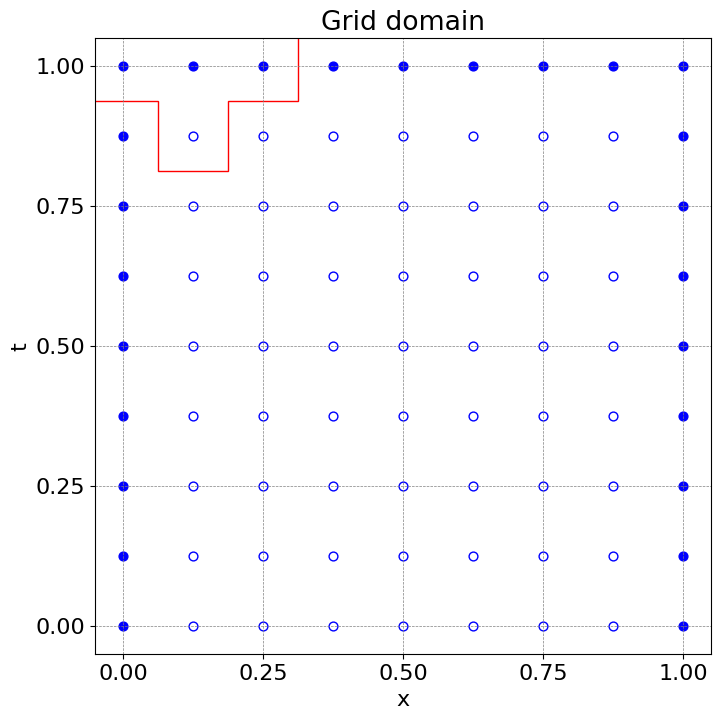

In [112]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(8, 8))

L = 1
T = 1
N = 8
K = 8
h = L/N
k = T/K

x = np.linspace(0, L, N+1)
t = np.linspace(0, L, N+1)
xx, tt = np.meshgrid(x, t)

# grid domain
gd = np.zeros((N+1, N+1))

gd[-1, :] = 1
# gd[-1, :] = 1
gd[:, 0] = 1
gd[:, -1] = 1



ax.scatter(xx[gd==0], tt[gd==0], c='w', edgecolors='b', s=40)
ax.scatter(xx[gd==1], tt[gd==1], c='b', s=40)
ax.set_aspect('equal')
ax.set_xticks(x[::2])
ax.set_yticks(t[::2])
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.grid(True, linestyle='--', linewidth=0.5, color='gray')

#%% Add a stencil polygon
polygon_points = np.array([[-0.5*h, 8.5*k], [2.5*h, 8.5*k], 
        [2.5*h, 7.5*k],  [1.5*h, 7.5*k], [1.5*h, 6.5*k],
        [0.5*h, 6.5*k], [0.5*h, 7.5*k], [-0.5*h, 7.5*k]])
ax.add_patch(plt.Polygon(polygon_points, closed=True, fill=None, edgecolor='r'))

ax.set_title('Grid domain')
plt.show()

Then we set $w_{i,j}$ as our numerical approximation of V(S,t)

$$
\frac{1}{k}\left(w_{i ,j+1}-w_{i, j}\right) + S\frac{\sigma^2}{2h^2}\left(w_{i+1, j}-2 w_{i j}+w_{i-1, j}\right) + rS\frac{1}{2h}\left(w_{i + 1, j}-w_{i - 1, j}\right) - rw_{i, j} = 0
$$

$$
w_{i, j+1} = k(-S\frac{\sigma^2}{2h^2}\left(w_{i+1, j}-2 w_{i j}+w_{i-1, j}\right) - rS\frac{1}{2h}\left(w_{i + 1, j}-w_{i - 1, j}\right) + rw_{i, j}) + w_{i j}
$$

$$
w_{i, j+1} = -kS\frac{\sigma^2}{2h^2}\left(w_{i+1, j}-2 w_{i j}+w_{i-1, j}\right) - krS\frac{1}{2h}\left(w_{i + 1, j}-w_{i - 1, j}\right) + krw_{i, j} + w_{i j}
$$

$$
w_{i, j+1} = -kS\frac{\sigma^2}{2h^2}w_{i+1, j} +kS\frac{\sigma^2}{h^2}w_{i j} - kS\frac{\sigma^2}{2h^2}w_{i-1, j} - krS\frac{1}{2h}w_{i + 1, j}+krS\frac{1}{2h}w_{i - 1, j} + krw_{i, j} + w_{i j}
$$

$$
w_{i, j+1} = (-kS\frac{\sigma^2}{2h^2} - krS\frac{1}{2h})w_{i+1, j} + (1 + kr+kS\frac{\sigma^2}{h^2})w_{i, j} + (-kS\frac{\sigma^2}{2h^2} + krS\frac{1}{2h})w_{i-1, j}
$$

Then, let
$$
\delta = kS^2\frac{\sigma^2}{2h^2} \\
\rho = kr \\
\phi = krS\frac{1}{2h} \\
$$

$$
w_{i, j+1} = (-\delta - \rho\phi)w_{i+1, j} + (1 + \rho+2\delta)w_{i, j} + (-\delta + \rho\phi)w_{i-1, j}
$$

In matrix form, this reads, 
$$
\left[\begin{array}{c}
w_{1, j+1} \\
\vdots \\
w_{m, j+1}
\end{array}\right]=\left[\begin{array}{ccccc}
1 + \rho+2\delta & -\delta - \rho\phi & 0 & \cdots & 0 \\
-\delta + \rho\phi & 1 + \rho+2\delta & -\delta - \rho\phi & \ddots & \vdots \\
0 & -\delta + \rho\phi & 1 + \rho+2\delta & \ddots & 0 \\
\vdots & \ddots & \ddots & \ddots & -\delta - \rho\phi \\
0 & \cdots & 0 & -\delta + \rho\phi & 1 + \rho+2\delta
\end{array}\right]\left[\begin{array}{c}
w_{1 j} \\
\vdots \\
w_{m j}
\end{array}\right]+\left[\begin{array}{c}
(-\delta + \rho\phi) w_{0, j} \\
0 \\
\vdots \\
0 \\
(-\delta - \rho\phi) w_{m+1, j}
\end{array}\right]
$$

However, our goal is to find the option price overtime, given that we know the option price distribution at maturity. This is given by the boundary condtion $C(S, T) = \max\{S - K, 0\}$.

So, Our typical forward difference method may not work.

Idea: Use backward difference quotient with respect to time, as we know the future values but not the present,
$$
\frac{\partial V}{\partial t}(S, t) \approx \frac{1}{k}(V(S, t)-V(S, t - h))
$$
and solve for $V(S, t - h)$.

**Stencil** (Backward differnece method)

![Stencil for backward Euler time discretization](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c6/Implicit_method-stencil.svg/1920px-Implicit_method-stencil.svg.png)

Figure: Wikipedia (Stencil of backward difference method)

The figure uses different index from us. Substitute:

- $n\gets j-1$
- $j\gets i$

Then, our discrete equation becomes
$$
\frac{1}{k}\left(w_{i ,j}-w_{i, j - 1}\right) + S_i\frac{\sigma^2}{2h^2}\left(w_{i+1, j}-2 w_{i j}+w_{i-1, j}\right) + rS_i\frac{1}{2h}\left(w_{i + 1, j}-w_{i - 1, j}\right) - rw_{i, j} = 0
$$

$$
w_{i, j-1} = (kS_i^2\frac{\sigma^2}{2h^2} + krS_i\frac{1}{2h})w_{i+1, j} + (1 - kr-kS_i\frac{\sigma^2}{h^2})w_{i, j} + (kS_i^2\frac{\sigma^2}{2h^2} - krS_i\frac{1}{2h})w_{i-1, j}
$$

Note: this is an explicit solution, as the future values of our Option price are know, even though we used the backwards difference quotient.

In matrix form, this reads, 
$$
\left[\begin{array}{c}
w_{1, j-1} \\
\vdots \\
w_{m, j-1}
\end{array}\right]=\left[\begin{array}{ccccc}
1- \rho-2\delta & \delta + \rho\phi & 0 & \cdots & 0 \\
\delta - \rho\phi & 1 - \rho-2\delta & \delta + \rho\phi & \ddots & \vdots \\
0 & \delta - \rho\phi & 1 - \rho-2\delta & \ddots & 0 \\
\vdots & \ddots & \ddots & \ddots & \delta + \rho\phi \\
0 & \cdots & 0 & \delta - \rho\phi & 1 - \rho-2\delta
\end{array}\right]\left[\begin{array}{c}
w_{1 j} \\
\vdots \\
w_{m j}
\end{array}\right]+\left[\begin{array}{c}
(\delta - \rho\phi) w_{0, j} \\
0 \\
\vdots \\
0 \\
(\delta + \rho\phi) w_{m+1, j}
\end{array}\right]
$$

In [113]:
import numpy as np

def solve_fdm_option_backwards(w, par):
    """
    Return the next time of the option price using difference method.
    
    Input:
        w: (1D array) Option price distribution at time t.
        par: (dict) Parameter for the difference method.
    Output:
        w_new: (1D array) Option price distribution at time t+1.
    """
    w_new = np.zeros_like(w[1:-1])

    # Main line of the difference method described above:
    w_new = (1 -par['k']*par['r'])*w[1:-1] \
        + (((par['S']*par['S'])*par['k']*(par['sig']*par['sig']))/(2*(par['h']*par['h']))) * (w[2:] - 2.*w[1:-1] + w[:-2]) \
        + par['k']*par['r']* par['S']* 1/(2*par['h'])*(w[2:] - w[:-2])
    
    return w_new

In [114]:
def solve_call_price_backwards(ic, bc1, bc2, sig, r, a, b, T, N, K):
    """
    Return numerical solution of Option Price with difference method.
    
    Input:
        ic: (1D array) Option Price distribution at t = T.
        bc1: (float or 1D array) Boundary condition at S=0. Constant boundary condition is assumed.
        bc2: (float or 1D array) Boundary condition at S= S-PV(K) (large S). Constant boundary condition is assumed.
        sig: volitility
        r: risk free rate
        a: (float) Left boundary.
        b: (float) Right boundary.
        T: (float) Final time.
        N: (int) Number of spatial grid points.
        K: (int) Number of time grid points.
        t0: (float) Initial time. (default=0.)
    Output:
        w: (2D array) Numerical solution.
    """
    w = np.zeros((N+2, K+1))
    h = (b-a)/(N+1)
    k = T/K
    par = {'sig': sig, 'r': r, 'h': h, 'k': k, 'S': np.arange(h, b, h)}

    # Initial/boundary condition
    w[:, K] = ic
    w[0, :] = bc1
    w[-1, :] = bc2

    # time marching
    for j in range(K, 0, -1):
        w[1:-1, j-1] = solve_fdm_option_backwards(w[:,j], par)

    return w

In [115]:
strike = 100
#Stable conditons, strike = 100, N = 100, K = 50, a = 0, b = 300, T = 10, sig = 0.2, r = 0.05
N = 100
K = 50
a = 0
b = 300
T = 10
sig = 0.2
r = 0.05
bc1 = 0
bc2 = b - strike*np.e**(-r*(T - (np.arange(0, T + T/K, T/K))))
f = np.vectorize(lambda S, strike: max((S - strike), 0.))
ic = f(np.arange(0,b + b/(N + 1), b/(N + 1)), strike)

In [116]:
w = solve_call_price_backwards(ic, bc1, bc2, sig, r, a, b, T, N, K)

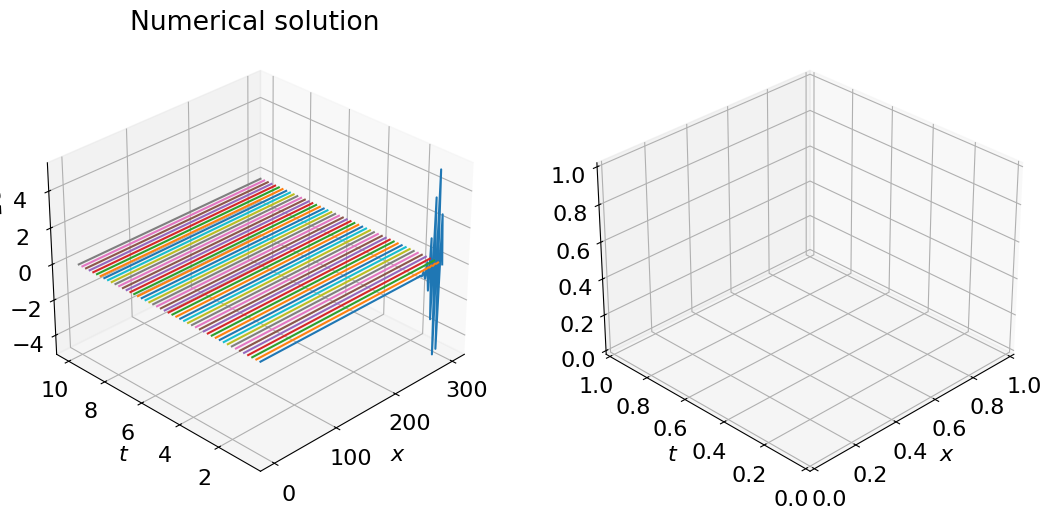

In [117]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(13, 6.5), subplot_kw={'projection':'3d'})

x = np.linspace(a, b, N+2)
t = np.linspace(0, T, K+1)

for j in range(3, K+1):
    ax[0].plot(x, t[j]*np.ones(N+2), w[:, j], label='Numerical')
    ax[0].set_title('Numerical solution')

# Change the angle of projection
for j in range(len(ax)):
    ax[j].set_xlabel('$x$')
    ax[j].set_ylabel('$t$')
    ax[j].view_init(elev=30, azim=225)

plt.show()

I attempt to use the forward differnce quotient, considering t = 0 to be the start time, but this style appears to fail

In [118]:
def solve_fdm_option(w, par):
    """
    Return the next time of the option price using difference method.
    
    Input:
        w: (1D array) Option price distribution at time t.
        par: (dict) Parameter for the difference method.
    Output:
        w_new: (1D array) Option price distribution at time t+1.
    """
    w_new = np.zeros_like(w[1:-1])

    # Main line of the difference method described above:
    w_new = (1 +par['k']*par['r'])*w[1:-1] \
        - par['S']*par['k']*(par['sig']*par['sig'])/(2*(par['h']*par['h']))*(w[2:] - 2.*w[1:-1] + w[:-2]) \
        - par['k']*par['r']* par['S']*1/(2*par['h'])*(w[2:] - w[:-2])
    
    return w_new

In [119]:
def solve_call_price_backwards(ic, bc1, bc2, sig, r, a, b, T, N, K):
    """
    Return numerical solution of Option Price with difference method.
    
    Input:
        ic: (1D array) Option Price distribution at t = T.
        bc1: (float or 1D array) Boundary condition at S=0. Constant boundary condition is assumed.
        bc2: (float or 1D array) Boundary condition at S= S-PV(K) (large S). Constant boundary condition is assumed.
        sig: volitility
        r: risk free rate
        a: (float) Left boundary.
        b: (float) Right boundary.
        T: (float) Final time.
        N: (int) Number of spatial grid points.
        K: (int) Number of time grid points.
        t0: (float) Initial time. (default=0.)
    Output:
        w: (2D array) Numerical solution.
    """
    w = np.zeros((N+2, K+1))
    h = (b-a)/(N+1)
    k = T/K
    par = {'sig': sig, 'r': r, 'h': h, 'k': k, 'S': np.arange(h, b, h)}

    # Initial/boundary condition
    w[:, 0] = ic
    w[0, :] = bc1
    w[-1, :] = bc2

    # time marching
    for j in range(0, K):
        w[1:-1, j+1] = solve_fdm_option(w[:,j], par)

    return w

In [120]:
# Parameters
strike = 105
N = 150
K = 100
a = 0
b = 200
T = 1  # Maturity in years
sig = 0.25  # Volatility
r = 0.05  # Risk-free rate
bc1 = 0  # Boundary condition at S=0
bc2 = np.array([max(i - strike*np.exp(-r*(T - (k/K))), 0) for i in np.linspace(a, b, N+2) for k in range(K+1)]).reshape(N+2, K+1)[-1]
ic = np.maximum(np.linspace(a, b, N+2) - strike, 0)  # Initial condition

In [121]:
# Execute the solver with the new settings
w = solve_call_price_backwards(ic, bc1, bc2, sig, r, a, b, T, N, K)

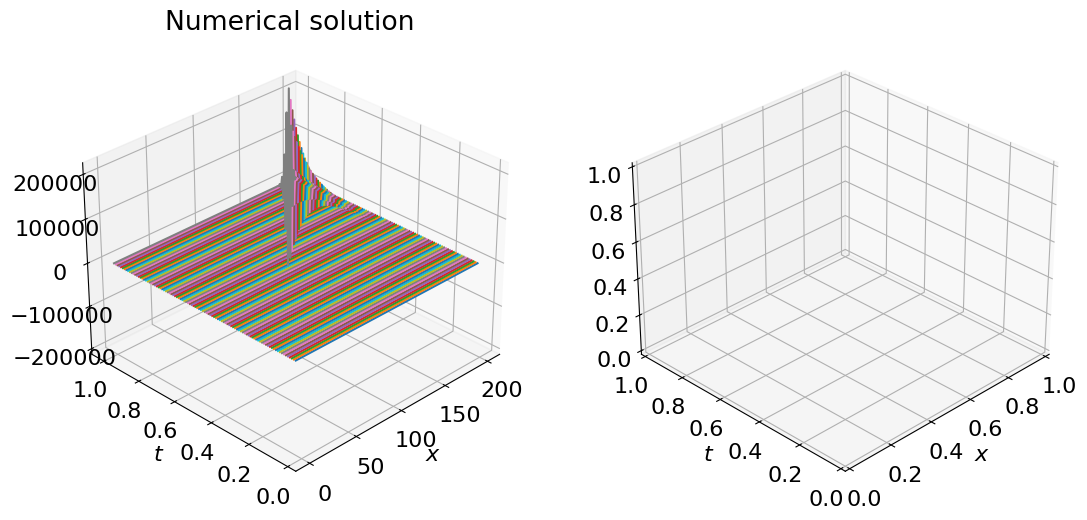

In [122]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(13, 6.5), subplot_kw={'projection':'3d'})

x = np.linspace(a, b, N+2)
t = np.linspace(0, T, K+1)

for j in range(3, K+1):
    ax[0].plot(x, t[j]*np.ones(N+2), w[:, j], label='Numerical')
    ax[0].set_title('Numerical solution')

# Change the angle of projection
for j in range(len(ax)):
    ax[j].set_xlabel('$x$')
    ax[j].set_ylabel('$t$')
    ax[j].view_init(elev=30, azim=225)

plt.show()